# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.calibration import CalibratedClassifierCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./HREmployeeAttrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

### Selecting the Categorical Varriable in dataset

In [7]:
onlyCateg =df.select_dtypes(include='object')

In [8]:
df.select_dtypes(exclude=['int', 'float']).columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Converting the Categorical to Numerical using Label Encoder

In [9]:
onlyCateg.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
#df.OverTime.unique()

In [12]:
label = LabelEncoder()
df['Attrition'] = label.fit_transform(df['Attrition'].astype('str'))
df['BusinessTravel'] = label.fit_transform(df['BusinessTravel'].astype('str'))
df['Department'] = label.fit_transform(df['Department'].astype('str'))
df['EducationField'] = label.fit_transform(df['EducationField'].astype('str'))
df['Gender'] = label.fit_transform(df['Gender'].astype('str'))
df['JobRole'] = label.fit_transform(df['JobRole'].astype('str'))
df['MaritalStatus'] = label.fit_transform(df['MaritalStatus'].astype('str'))
df['Over18'] = label.fit_transform(df['Over18'].astype('str'))
df['OverTime'] = label.fit_transform(df['OverTime'].astype('str'))

In [13]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [14]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Finding Outliers

In [15]:
l=df.columns
len(l)

35

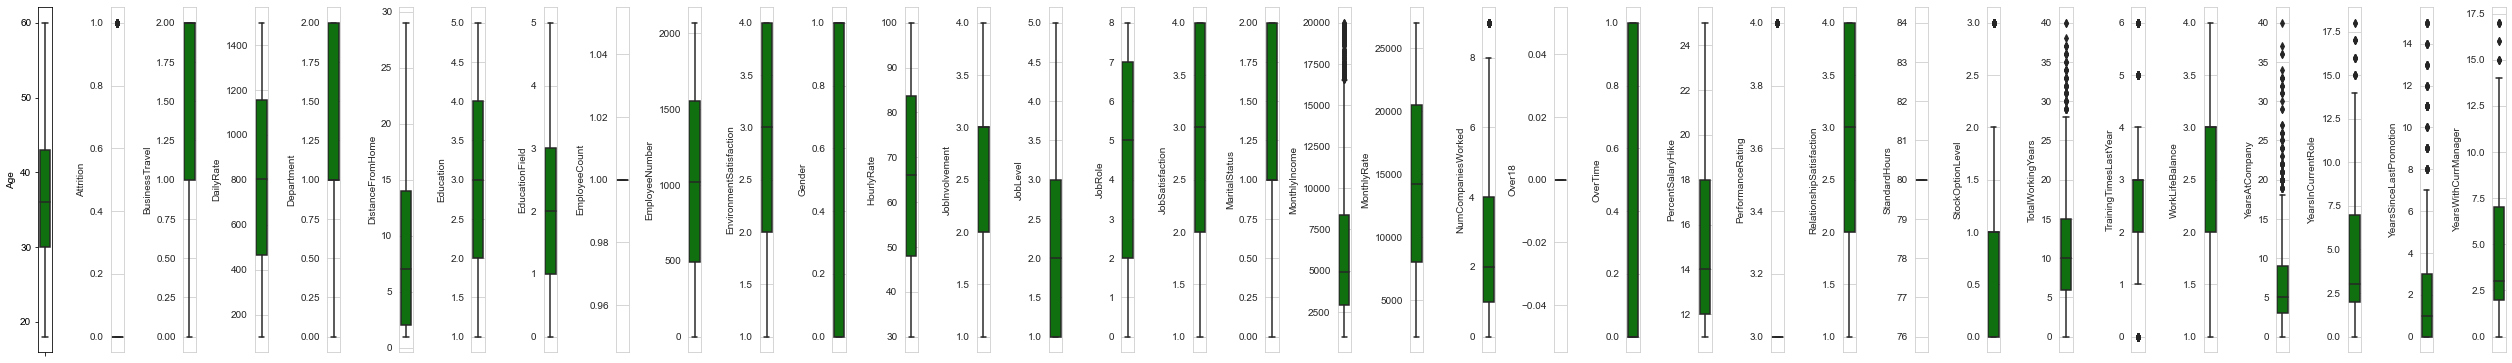

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

l=df.columns
number_of_columns=35
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))

for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

In [17]:
df.shape

(1470, 35)

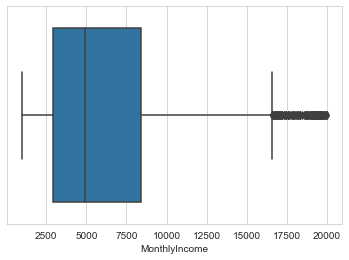

In [18]:
import seaborn as sns
sns.boxplot(x=df['MonthlyIncome'])
#Removing the Outliers from Monthly Income
df.drop(df[df['MonthlyIncome']> 11000].index, inplace=True)

In [19]:
df.drop(df[df['TotalWorkingYears']> 20].index, inplace=True)

In [20]:
df.drop(df[df['YearsAtCompany']> 17.5].index, inplace=True)

In [21]:
df.drop(df[df['YearsInCurrentRole']> 14].index, inplace=True)

In [22]:
df.drop(df[df['YearsInCurrentRole']> 14].index, inplace=True)

In [23]:
df.drop(df[df['YearsWithCurrManager']> 14].index, inplace=True)

In [24]:
df.drop(df[df['YearsSinceLastPromotion']> 2].index, inplace=True)

In [25]:
#sns.boxplot(x=df['YearsSinceLastPromotion'])

In [26]:
#df4.shape

## Feature Egineering

[0.03587563 0.02422939 0.02968277 0.02157808 0.03924942 0.02639765
 0.03118861 0.         0.03098361 0.04135851 0.02069431 0.03151763
 0.03191845 0.03181029 0.03031154 0.03877682 0.03080391 0.03825795
 0.0318213  0.03096707 0.         0.0702954  0.0305739  0.01283808
 0.03078131 0.         0.03309407 0.03756551 0.02674285 0.03187222
 0.03585756 0.03142624 0.02381582 0.03771408]


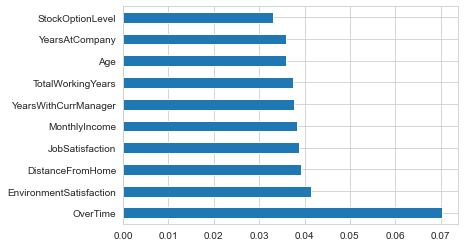

In [27]:
X = df.drop(['Attrition'], axis=1)  #independent columns
y = df.Attrition   #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [28]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [29]:
df2 = df.drop(['BusinessTravel', 'DailyRate', 'Department',
       'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'Gender', 'HourlyRate',
       'JobRole',
       'MaritalStatus','MonthlyRate',
       'Over18', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'], axis=1)

In [30]:
X = df2.drop(['Attrition'], axis=1) #Independant varriable
y =  df2.Attrition  #Dependant Varriable

In [31]:
X.columns

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'OverTime', 'TotalWorkingYears', 'YearsAtCompany'],
      dtype='object')

### Dividing the dataset to Training and Testing

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30)

### Applying Cross Validation Algorithm

In [33]:
logistic = LogisticRegression()

score = cross_val_score(logistic, X, y)
score.mean()   #Evaluating the Performance

0.8202988656195463

In [34]:
dtree = DecisionTreeClassifier()

cross_val_score(dtree, X, y)  #Evaluating the Performance

array([0.74479167, 0.73958333, 0.78534031, 0.7486911 , 0.78534031])

In [35]:
forest = RandomForestClassifier()

score = cross_val_score(forest, X, y)

score.mean()  #Evaluating the Performance

0.8349149214659686

#### Selecting the best model based on the highest score, From the above result, selecting Random Forest model, since it performed well

In [36]:
forest.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
yPred = forest.predict(X_test)

In [38]:
X_test.shape

(288, 11)

In [48]:
#Evaluating Type1 and Type 2 errors (ie. FP and FN)
confusion_matrix(y_test,yPred)   

array([[227,  10],
       [ 43,   8]], dtype=int64)

In [40]:
accuracy_score(y_test,yPred)

0.8159722222222222

### Checking Model Efficiency - AUC ROC Curve

In [41]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [42]:
X1 = df2.drop(['Attrition'], axis=1)  #independent columns
y = df2.Attrition   #target column i.e price range

In [43]:
y_prob =  forest.predict_proba(X1)

y_prob = y_prob[:,1]

auc = roc_auc_score(y, y_prob)
print('AUC: %.2f' % auc)

AUC: 0.95


In [44]:
fpr, tpr, thresholds = roc_curve(y, y_prob)

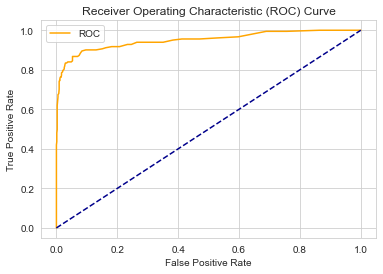

In [45]:
plot_roc_curve(fpr, tpr)

In [46]:
a= np.column_stack((X_test, y_test))
b = np.column_stack((a,yPred))
to_df = pd.DataFrame(b)

to_df.to_csv('./forTabl.csv')

In [47]:
X_test.columns
#y_test

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'OverTime', 'TotalWorkingYears', 'YearsAtCompany'],
      dtype='object')